# Taller de Splines

Gary Defas

Repositorio en GitHub:


### Código auxiliar para splines cúbicos con condición natural o de frontera

In [ ]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [ ]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], B0: float, B1: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - B0, B1: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

## 1) Comprobar gráficamente los siguientes ejercicios

### 1. (0,1), (1,5), (2,3)

In [ ]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

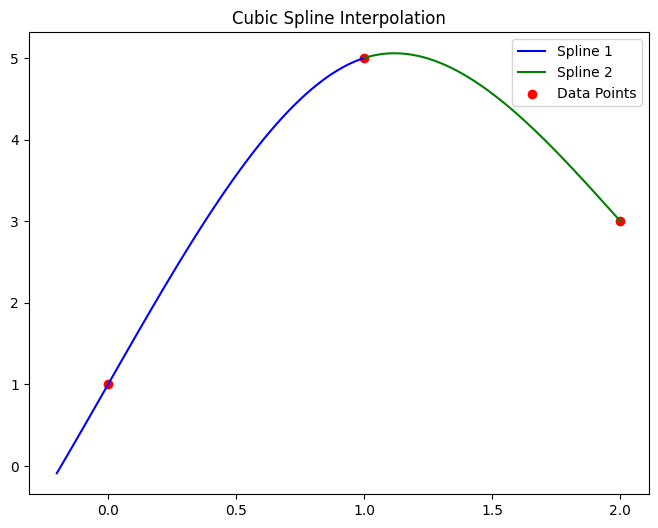

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, 1], [1, 5], [2, 3]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = -1.5*x1**3 + 5.5*x1 + 1

x2 = np.linspace(1, 2, 100)
splin_2 = x2 + 1.5*(x2-1)**3 - 4.5*(x2-1)**2 + 4

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

### 2. (0,-5), (1,-4), (2,3)

In [ ]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")


1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


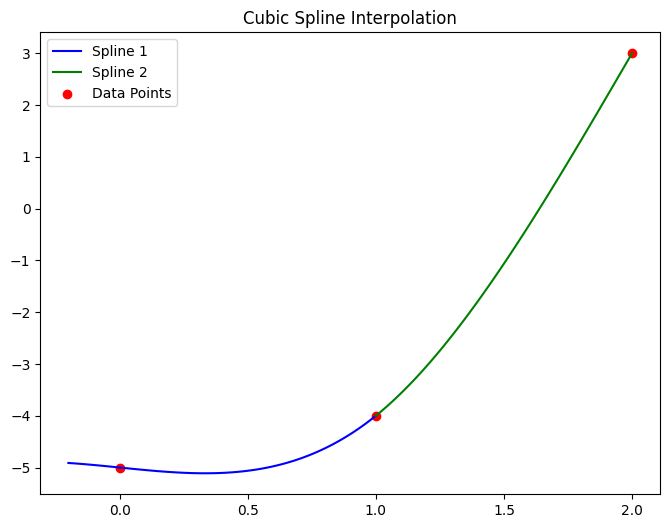

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, -5], [1, -4], [2, 3]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = 1.5*x1**3 - 0.5*x1 - 5

x2 = np.linspace(1, 2, 100)
splin_2 = 4*x2 - 1.5*(x2-1)**3 + 4.5*(x2-1)**2 - 8

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

### 3. (0,-1), (1,1), (2,5), (3,2)

In [ ]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")


2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


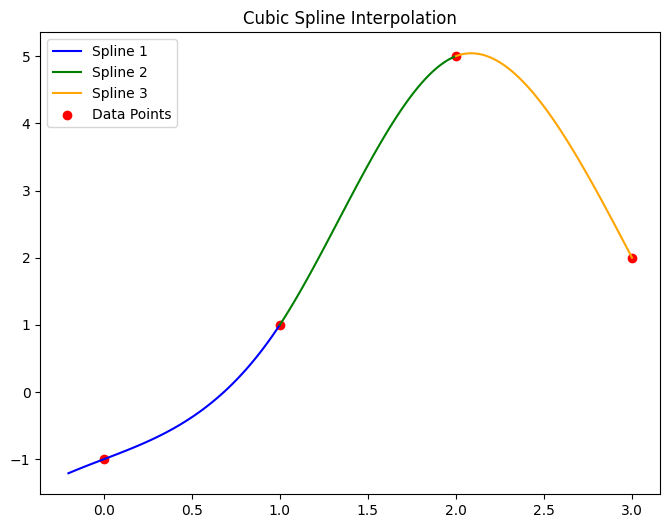

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, -1], [1, 1], [2, 5], [3, 2]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = x1**3 + x1 - 1

x2 = np.linspace(1, 2, 100)
splin_2 = 4*x2 - 3*(x2-1)**3 + 3*(x2-1)**2 - 3


x3 = np.linspace(2, 3, 100)
splin_3 = x3 + 2*(x3-2)**3 - 6*(x3-2)**2 + 3

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')
plt.plot(x3, splin_3, label='Spline 3', color='orange')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

## 2) Los mismos ejercicios anteriores pero con condiciones de frontera $B_0=1$ y $B_1 \in \mathbb{R}$

### 1. (0,1), (1,5), (2,3)

In [ ]:
cubic_spline_clamped(
    xs = [0, 1, 2],
    ys = [1, 5, 3],
    B0=1,
    B1=-1,
)

1 5 1.5 -8.0 4.5
0 1 1.0 8.5 -5.5


[-5.5*x**3 + 8.5*x**2 + 1.0*x + 1,
 1.5*x + 4.5*(x - 1)**3 - 8.0*(x - 1)**2 + 3.5]

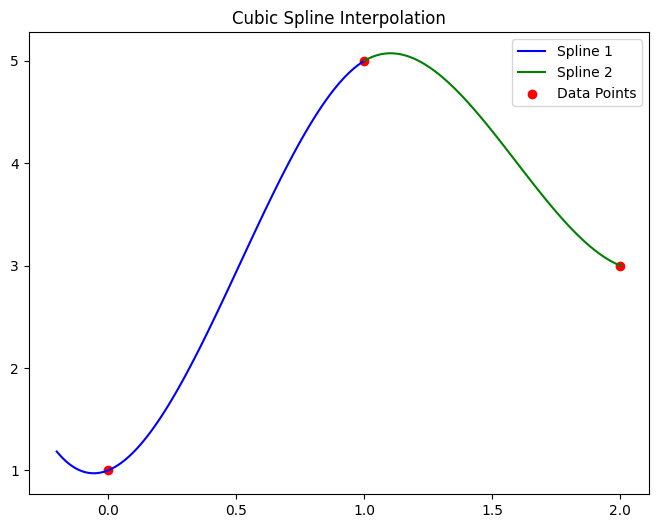

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, 1], [1, 5], [2, 3]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = -5.5*x1**3 + 8.5*x1**2 +x1+ 1

x2 = np.linspace(1, 2, 100)
splin_2 = 1.5*x2 + 4.5*(x2-1)**3 - 8*(x2-1)**2 + 3.5

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

### 2. (0,-5), (1,-4), (2,3)

In [ ]:
cubic_spline_clamped(
    xs = [0, 1, 2],
    ys = [-5, -4, 3],
    B0=1,
    B1=-1,
)

1 -4 6.0 10.0 -9.0
0 -5 1.0 -5.0 5.0


[5.0*x**3 - 5.0*x**2 + 1.0*x - 5,
 6.0*x - 9.0*(x - 1)**3 + 10.0*(x - 1)**2 - 10.0]

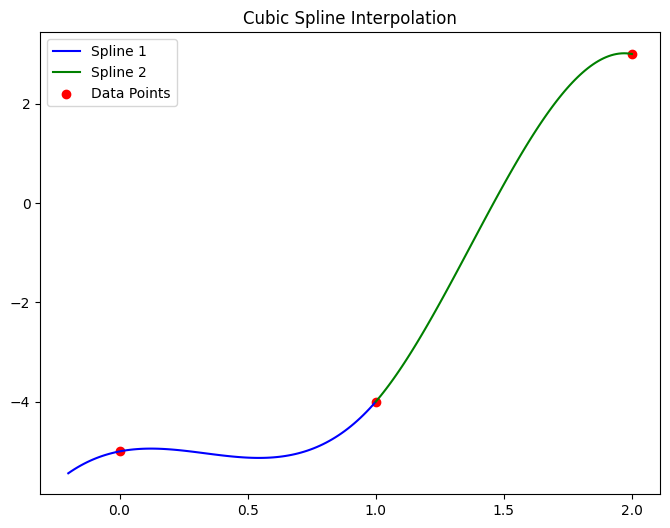

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, -5], [1, -4], [2, 3]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = 5*x1**3 - 5*x1**2 + x1 - 5

x2 = np.linspace(1, 2, 100)
splin_2 = 6*x2 - 9*(x2-1)**3 + 10*(x2-1)**2 - 10

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

### 3. (0,-1), (1,1), (2,5), (3,2)

In [ ]:
cubic_spline_clamped(
    xs = [0, 1, 2, 3],
    ys = [-1, 1, 5, 2],
    B0=1,
    B1=1,
)


2 5 -0.600000000000001 -8.799999999999999 6.3999999999999995
1 1 4.3999999999999995 3.8 -4.199999999999999
0 -1 1.0 -0.3999999999999999 1.3999999999999997


[1.4*x**3 - 0.4*x**2 + 1.0*x - 1,
 4.4*x - 4.2*(x - 1)**3 + 3.8*(x - 1)**2 - 3.4,
 -0.600000000000001*x + 6.4*(x - 2)**3 - 8.8*(x - 2)**2 + 6.2]

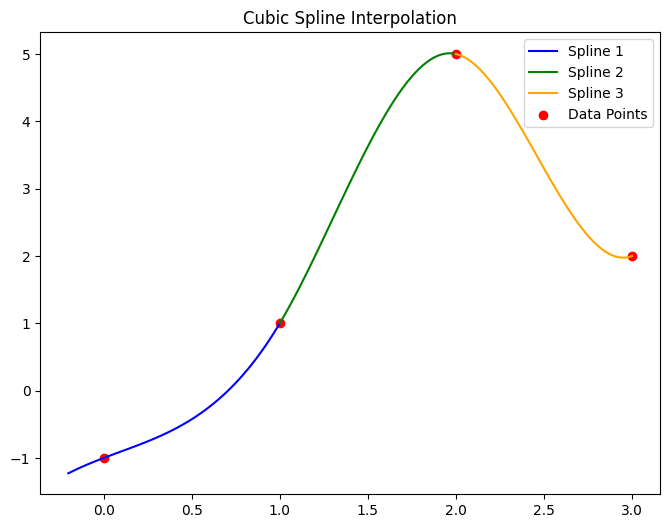

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[0, -1], [1, 1], [2, 5], [3, 2]])

x1 = np.linspace(-0.2, 1, 100)
splin_1 = 1.4*x1**3 - 0.4*x1**2 + x1 - 1

x2 = np.linspace(1, 2, 100)
splin_2 = 4.4*x2 - 4.2*(x2 - 1)**3 + 3.8*(x2 - 1)**2 - 3.4


x3 = np.linspace(2, 3, 100)
splin_3 = -0.600000000000001*x3 + 6.4*(x3 - 2)**3 - 8.8*(x3 - 2)**2 + 6.2

plt.figure(figsize=(8,6))
plt.plot(x1, splin_1, label='Spline 1', color='blue')
plt.plot(x2, splin_2, label='Spline 2', color='green')
plt.plot(x3, splin_3, label='Spline 3', color='orange')

plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Data Points')

plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

## ANIMACIONES

### Cambio de punto
Animación donde se utiliza los splines y 3 puntos donde hay un punto que está entre el punto 2 y 3, entonces este punto se le puede mover en un eje y y que se muestre como es que se cambia el splin en los puntos 2 y 3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
import sympy as sym

def plot_natural_spline_animation(x1_val, y2_val):
    """
    Calcula y grafica el spline cúbico natural,
    variando las coordenadas y del segundo y tercer punto.
    """
    # Puntos fijos y variables (x1_val y y2_val provienen de los sliders)
    xs = [0, 1, x1_val, 3]
    ys = [-1, 3, y2_val, 2]

    # Calcular los splines cúbicos (condición natural)
    try:
        splines = cubic_spline(xs=xs, ys=ys)
    except NameError:
        print("Error: La función 'cubic_spline' no está definida. Por favor, ejecuta la celda de código auxiliar.")
        return

    x = sym.Symbol("x")

    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))

    # Graficar los puntos de control
    plt.scatter(xs, ys, color='red', zorder=5, label='Puntos de control')

    # Graficar cada segmento del spline
    for i, S in enumerate(splines):
        x_min = xs[i]
        x_max = xs[i+1]

        # Crear un rango de valores para graficar
        x_range = np.linspace(x_min, x_max, 100)

        # Convertir la expresión simbólica de SymPy a una función numérica
        f = sym.lambdify(x, S, 'numpy')
        y_range = f(x_range)

        plt.plot(x_range, y_range, label=f'S{i}(x)')

    plt.title('Animación de Spline Cúbico Natural con Puntos Móviles (P2 y P3)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.ylim(-5, 10) # Rango y fijo para estabilidad de la animación
    plt.xlim(0, 3) # Rango x fijo
    plt.show()

# Crear los sliders interactivos para y1 y y2
interactive_plot = interactive(
    plot_natural_spline_animation,
    x1_val=(1.0, 3.0, 0.1), # y del segundo punto (índice 1)
    y2_val=(0.0, 10.0, 0.1)  # y del tercer punto (índice 2)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=2.0, description='x1_val', max=3.0, min=1.0), FloatSlider(value=5.0, d…

### Frontera Condicionada
Usando la frontera condicionada, se debe hacer un slider para que se cambie este número y se muestre la animación de las gráficas donde se note que se cambie las gráficas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
import sympy as sym

# Se asume que la función cubic_spline_clamped está definida en celdas anteriores.

def plot_clamped_spline_animation(B1_val):

    xs = [0, 1, 2]
    ys = [1, 5, 3]
    B0 = 1.0

    try:
        splines = cubic_spline_clamped(xs=xs, ys=ys, B0=B0, B1=B1_val)
    except NameError:
        print("Error: La función 'cubic_spline_clamped' no está definida. Por favor, ejecuta la celda de código auxiliar.")
        return

    x = sym.Symbol("x")

    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))

    # Graficar los puntos de control
    plt.scatter(xs, ys, color='red', zorder=5, label='Puntos de control')

    # Graficar cada segmento del spline
    for i, S in enumerate(splines):
        x_min = xs[i]
        x_max = xs[i+1]

        # Crear un rango de valores para graficar
        x_range = np.linspace(x_min, x_max, 100)

        # Convertir la expresión simbólica de SymPy a una función numérica
        f = sym.lambdify(x, S, 'numpy')
        y_range = f(x_range)

        plt.plot(x_range, y_range, label=f'S{i}(x)')

    plt.title(f'Spline Cúbico Condicionado con $B_0={B0}$ y $B_1={B1_val:.2f}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.ylim(-5, 10) # Rango y fijo para estabilidad
    plt.xlim(0, 2) # Rango x fijo
    plt.show()

# Crear el slider interactivo para B1
# B1 es la derivada en el punto final (x=2)
interactive_plot_B1 = interactive(
    plot_clamped_spline_animation,
    B1_val=(-5.0, 5.0, 0.1) # Rango de la derivada final B1
)

display(interactive_plot_B1)

interactive(children=(FloatSlider(value=0.0, description='B1_val', max=5.0, min=-5.0), Output()), _dom_classes…